### About:
5/11/2021 Program calculate the correlation coefficient between state and age population in 2017

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="YlGnBu", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Population Range

#### Preprocess Data

In [3]:
!ls

Correlation-2008.ipynb
Correlation-2009.ipynb
Correlation-2010.ipynb
Correlation-2011.ipynb
Correlation-2012.ipynb
Correlation-2013.ipynb
Correlation-2014.ipynb
Correlation-2015.ipynb
Correlation-2016.ipynb
Correlation-2017.ipynb
Original Dataset
preprocessed_data.xlsx
sheet.xlsx


In [4]:
def parse_data_bis(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows = [51,52,53,54,55,56,57,58,59,60,61,62], usecols=[1,2,3,4,5,6,7])
    return dataset

In [5]:
df_bis = parse_data_bis("sheet.xlsx", "2017") # Due to long name access, I made a copy of preprocessed_data.xlsx and change to sheet

In [6]:
df_bis.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,1138300,430500,536200,1207200,645600,783600,4741400
1,192300,63500,97900,183600,92400,80500,710100
2,1686200,637200,815200,1677000,839900,1185700,6841300
3,730600,265200,329800,726600,377100,480600,2910000
4,9363800,3697900,5240600,10277900,4720500,5413200,38713900


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


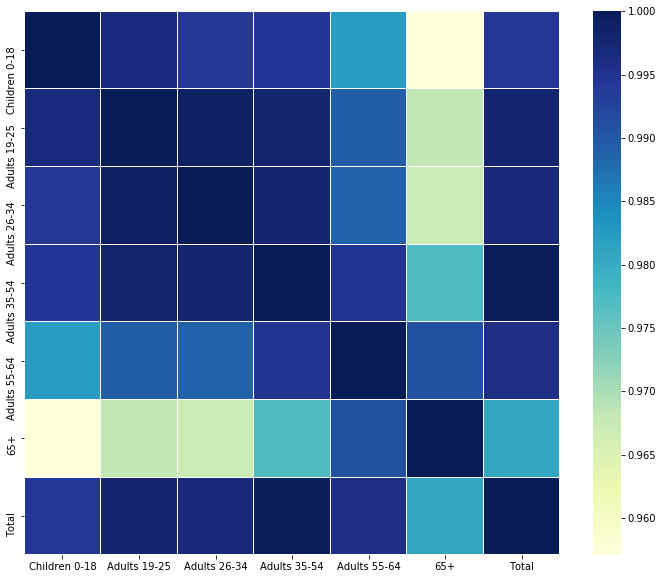

In [7]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


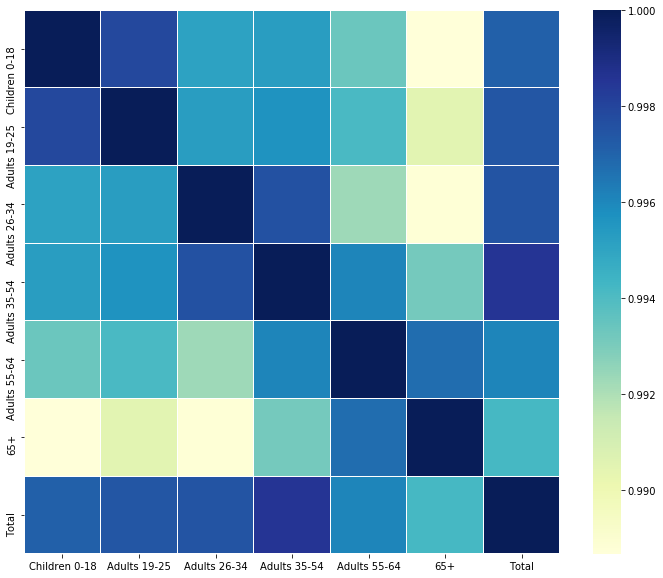

In [8]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


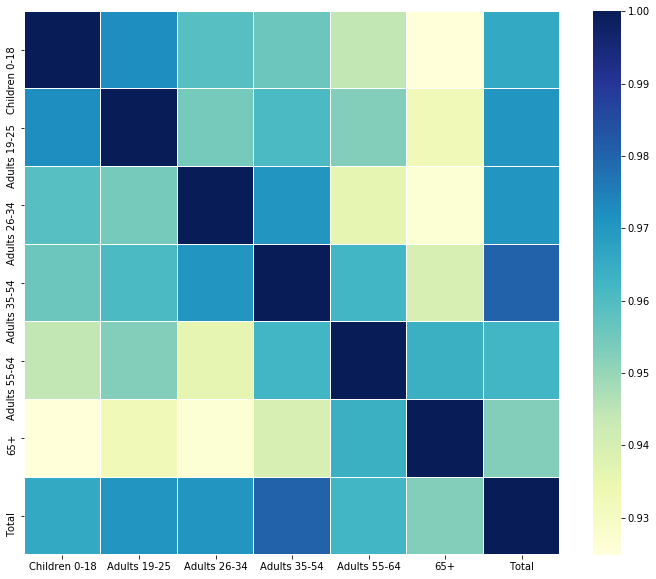

In [9]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [10]:
def parse_data_bs(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,51,52,53,54,55,56,57,58,59,60,61,62], usecols=[0,1,2,3,4,5,6,7], drop=True)
    dataset.set_index("Alabama", inplace=True)
    dataset = dataset.T
    
    return dataset

In [12]:
df_bs = parse_data_bs("sheet.xlsx", "2017")

In [13]:
df_bs.head()

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1138300,192300,1686200,730600,9363800,1299900,771100,208200,4362200,2612200,312600,...,214000,1561400,7659600,960500,119800,1925700,1701700,385000,1319600,142400
430500,63500,637200,265200,3697900,492600,297600,78500,1698300,908000,100400,...,72000,560900,2612700,325400,52500,717900,628700,148600,495600,48500
536200,97900,815200,329800,5240600,757900,394900,110500,2330300,1216400,169700,...,104100,791900,3587100,398900,65500,983000,965900,178300,643300,69400
1207200,183600,1677000,726600,10277900,1451700,927200,231500,5217900,2754900,341900,...,196700,1706900,7243100,736000,151900,2188700,1899400,448700,1441400,133100
645600,92400,839900,377100,4720500,697400,509500,132900,2777200,1257200,182000,...,114400,874700,3155200,296800,96300,1079500,949100,260600,812500,81500


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


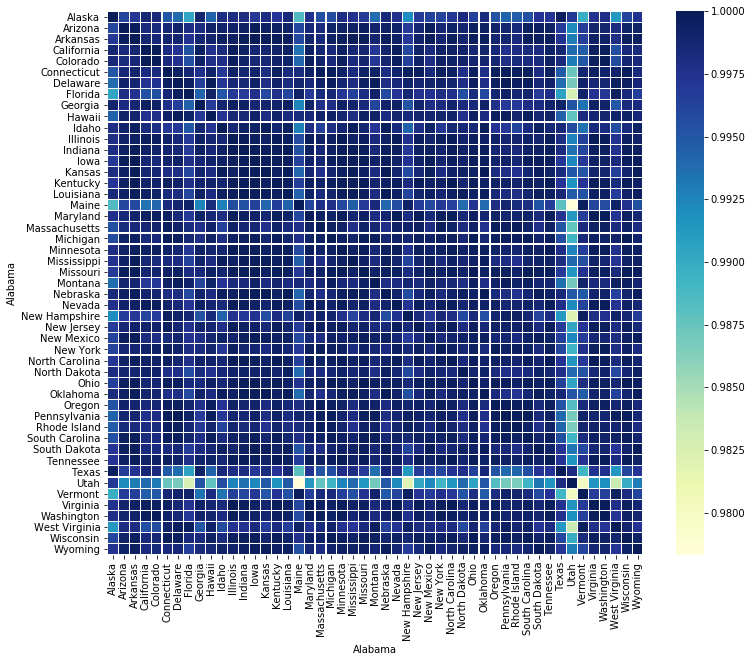

In [14]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


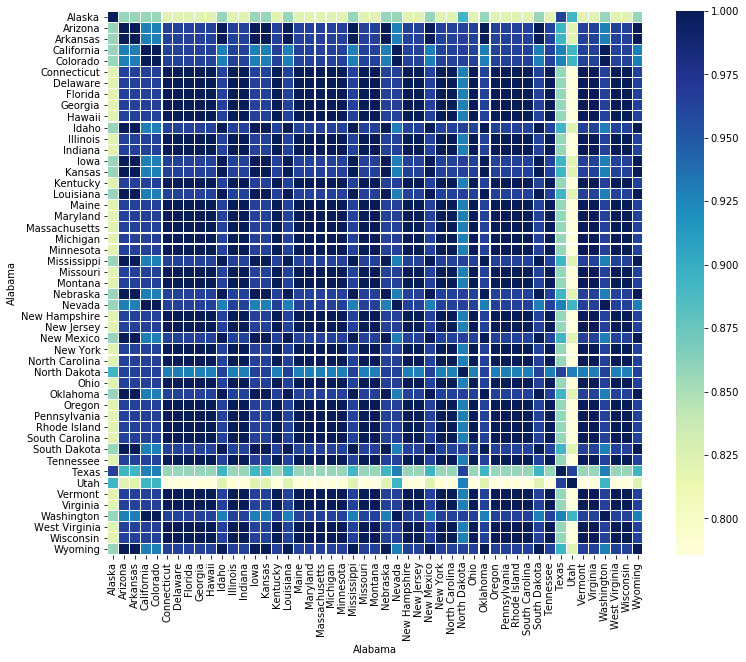

In [15]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


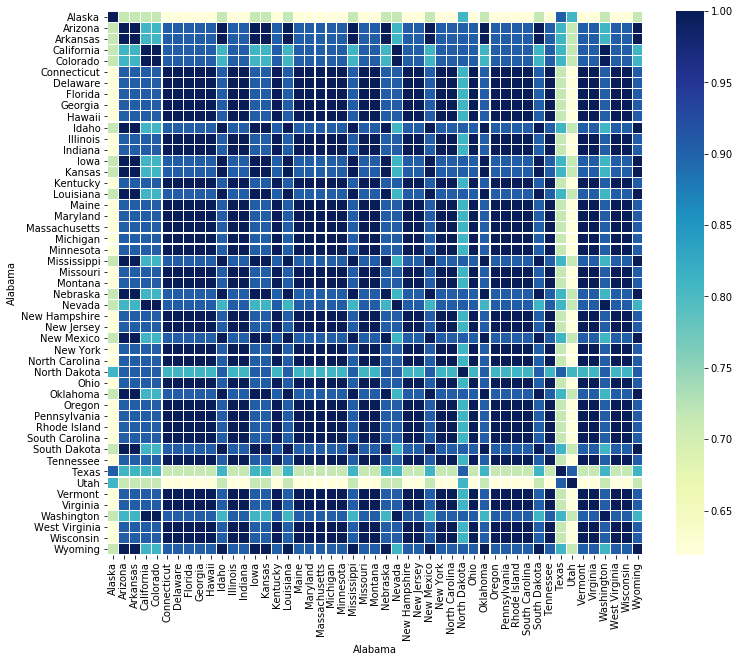

In [16]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?